<a href="https://colab.research.google.com/github/AshrafalKhalique/ENCRYPTIX-/blob/main/Intern_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [ ]:
# Load the dataset
data_path = '/content/drive/MyDrive/Internship/Task3_Churn/Churn_Modelling.csv'  # Replace with your actual path
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Pre-processing**

**Handling Missing Values**

In [ ]:
# Handling missing value
def check_missing_duplicate(data):
    missing_values = data.isnull().sum()
    print('='*40)
    print("Columns with missing values:")
    print(missing_values)
    print('='*40)
    # Check for duplicate
    duplicate_rows = data.duplicated()
    print("Number of duplicate rows:", duplicate_rows.sum())

check_missing_duplicate(df)

Columns with missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Number of duplicate rows: 0


In [ ]:
#Delete unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Pre-processing
def preprocess_df(data):
    # Numerical columns and Categorical columns
    numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    data[categorical_columns] = data[categorical_columns].astype('category')
    print(data.info())
    return data, numerical_columns, categorical_columns

df, num_cols_train, cat_cols_train = preprocess_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB
None


In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
cat_cols_train

['Geography', 'Gender']

In [ ]:
num_cols_train

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# **EDA and Visualizations**

In [ ]:
# EDA: Basic Statistics
print("Basic Statistics of Numerical Features:")
print(df[num_cols_train].describe())

print("\nUnique Values in Categorical Features:")
for col in cat_cols_train:
    print(f"{col}: {df[col].nunique()} unique values")

Basic Statistics of Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        

# **Target analysis**

In [ ]:
# The target is estracted from the train
target = df["Exited"]
target.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

**Correlation Matrix**

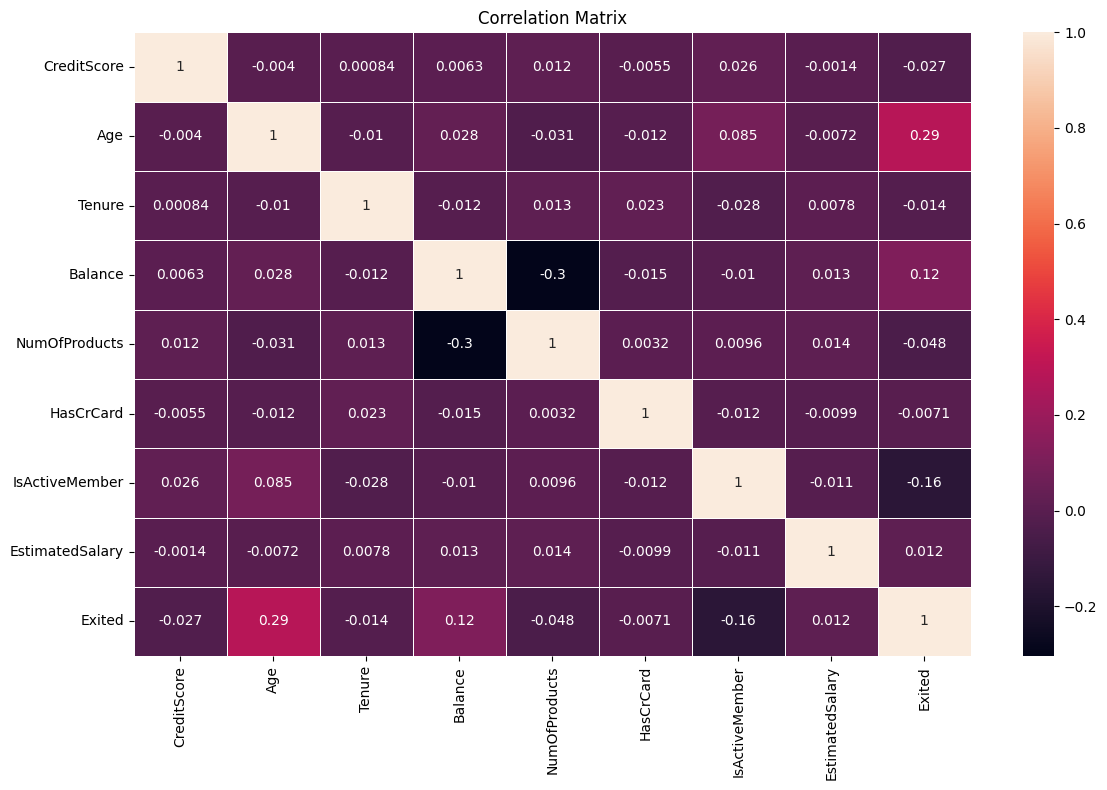

In [ ]:
# Correlation Matrix
correlation_matrix = df[num_cols_train].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('Correlation Matrix.png',dpi=300)
plt.show()

**Pair Plot**

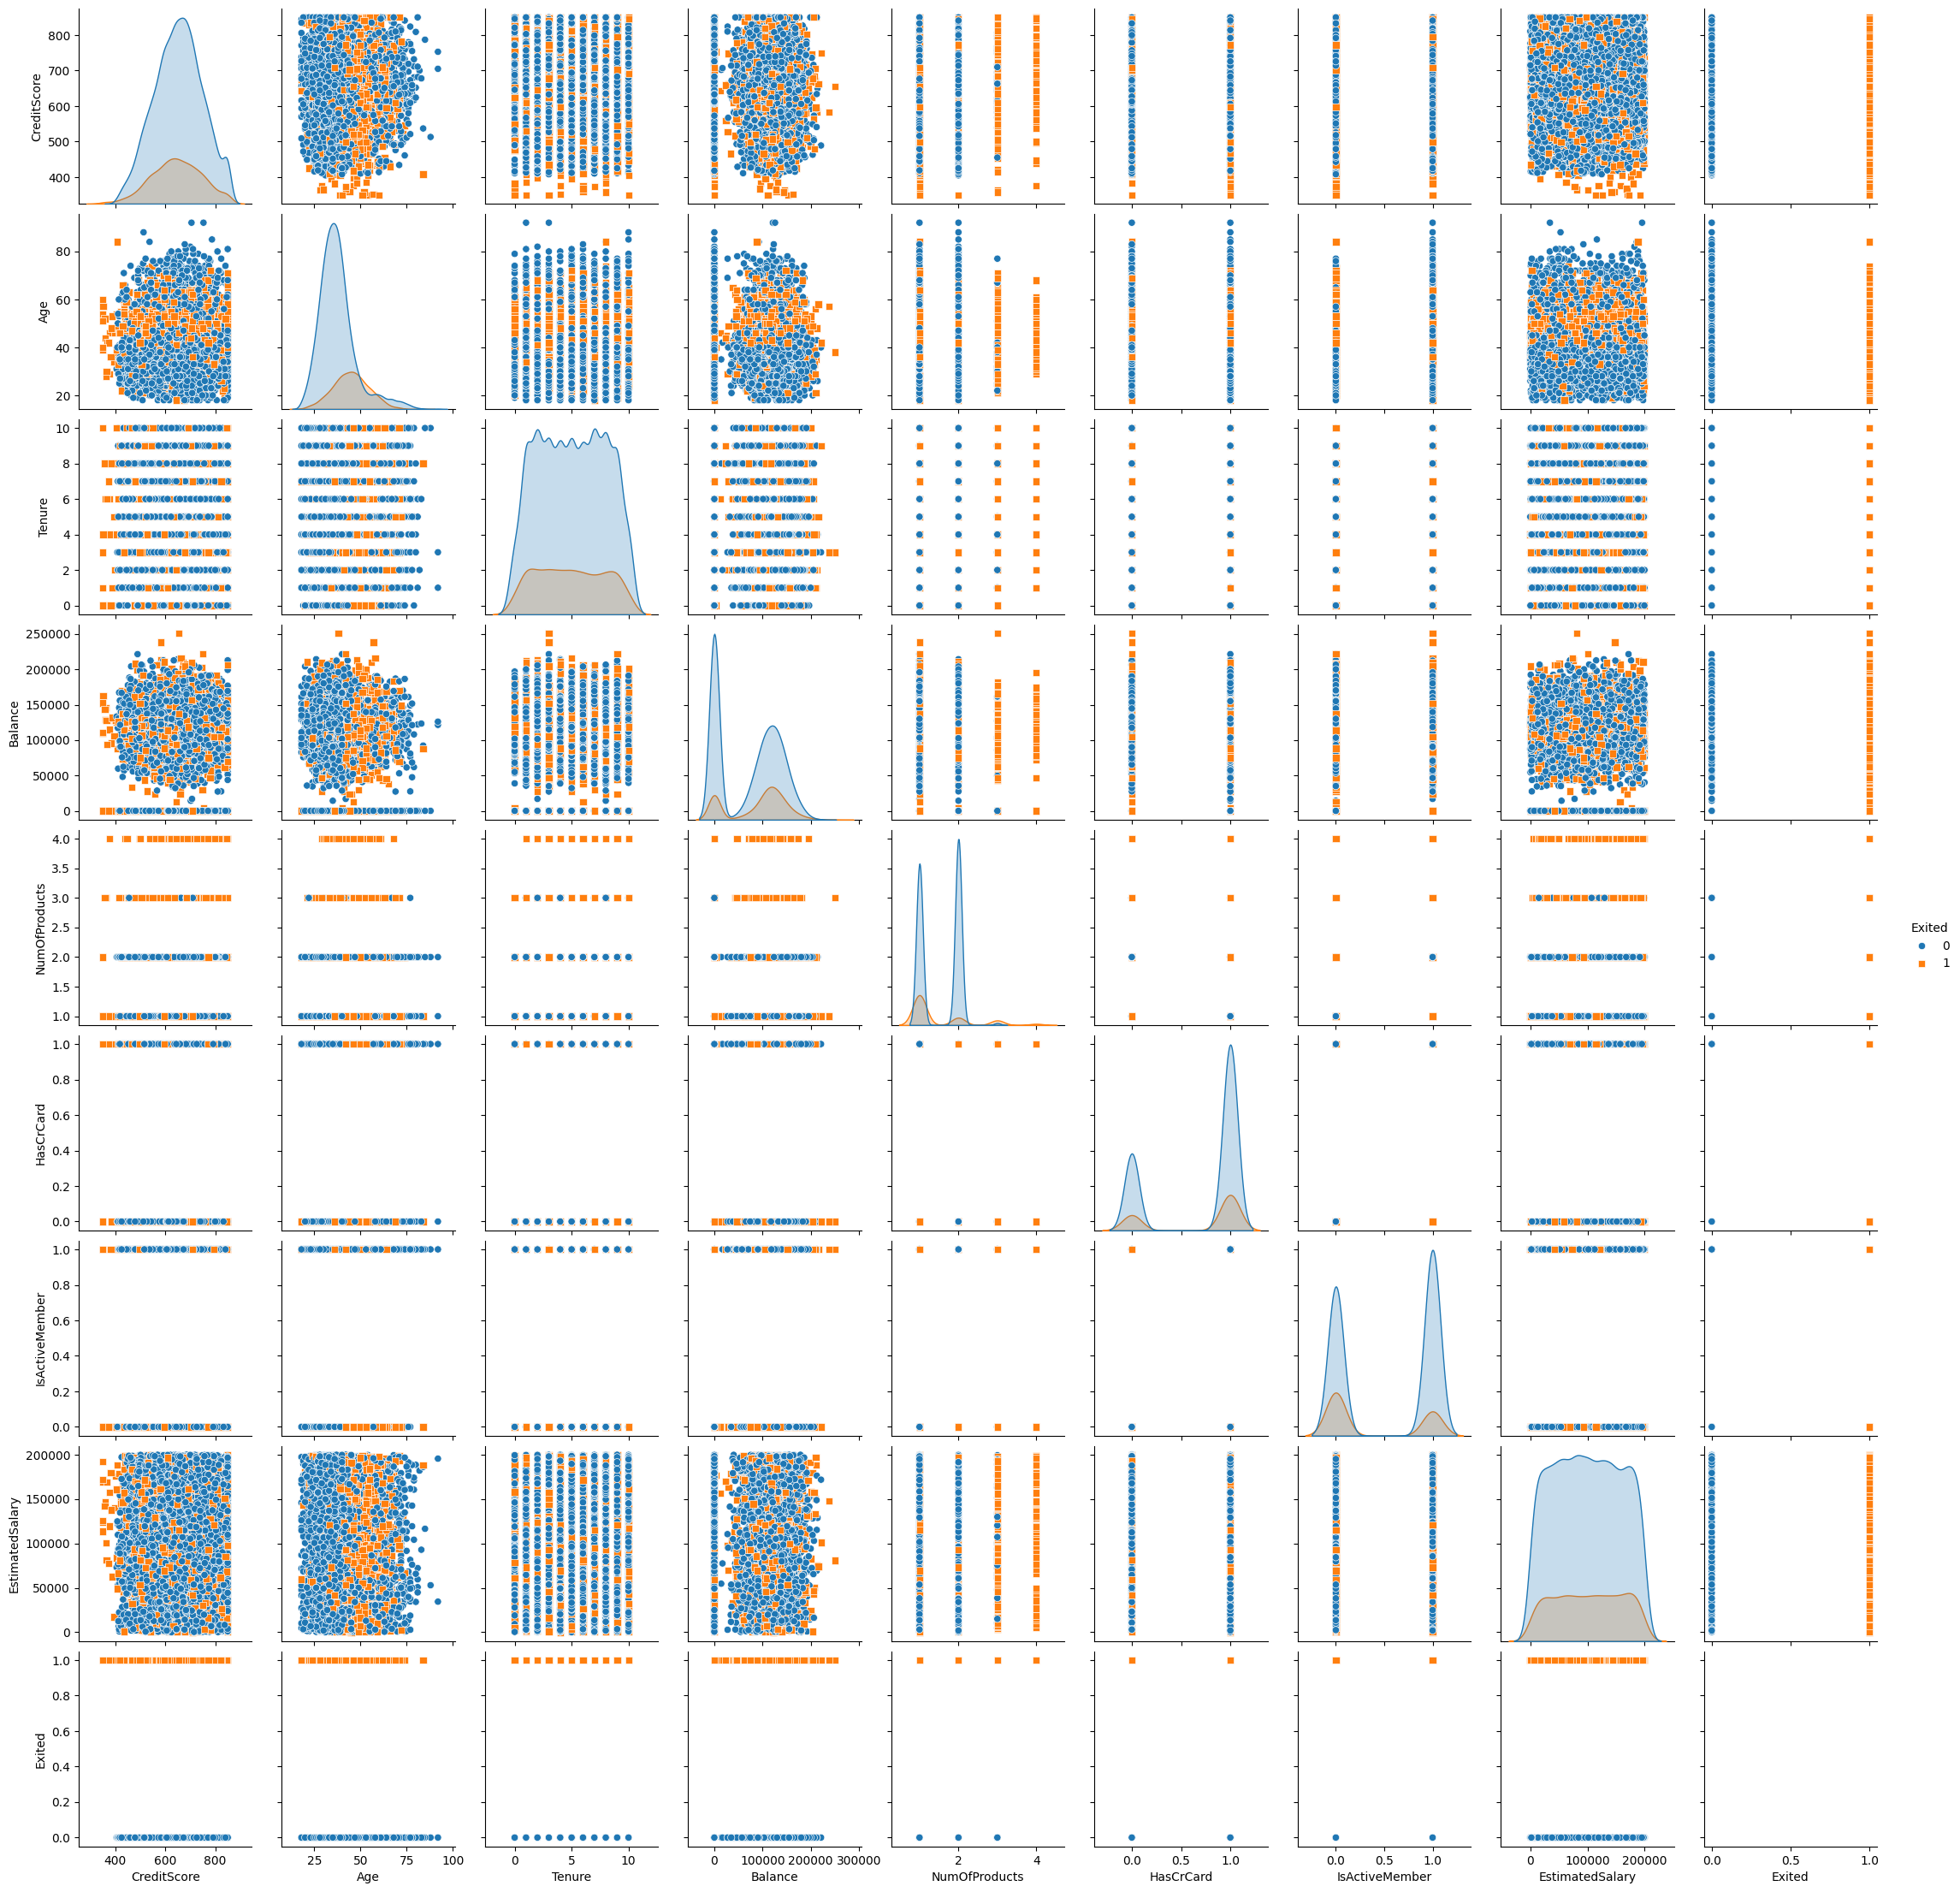

In [ ]:
# Pair plot for numerical features
sns.pairplot(df, vars=num_cols_train, hue='Exited', markers=["o", "s", "D"])
plt.savefig('Pairplot.png',dpi=300)
plt.show()

**Distribution of Numerical Features**

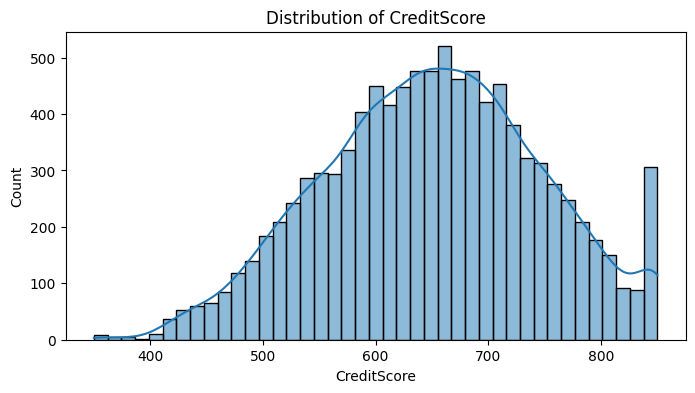

<Figure size 640x480 with 0 Axes>

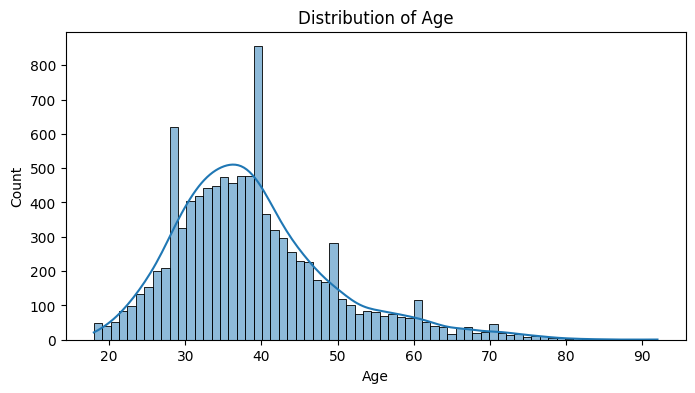

<Figure size 640x480 with 0 Axes>

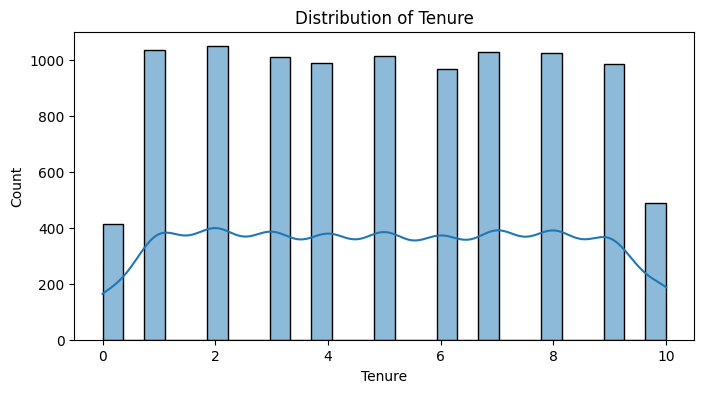

<Figure size 640x480 with 0 Axes>

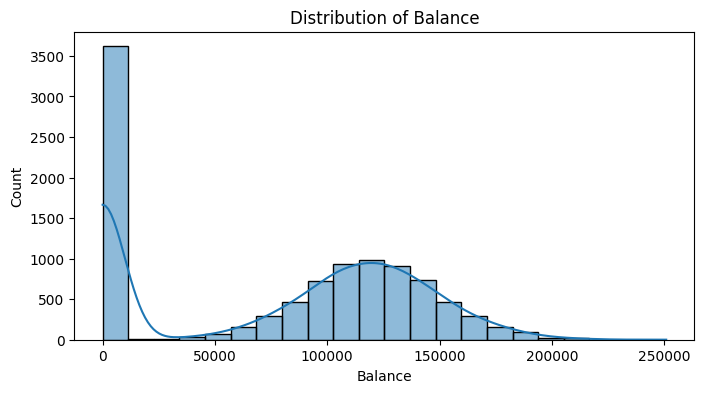

<Figure size 640x480 with 0 Axes>

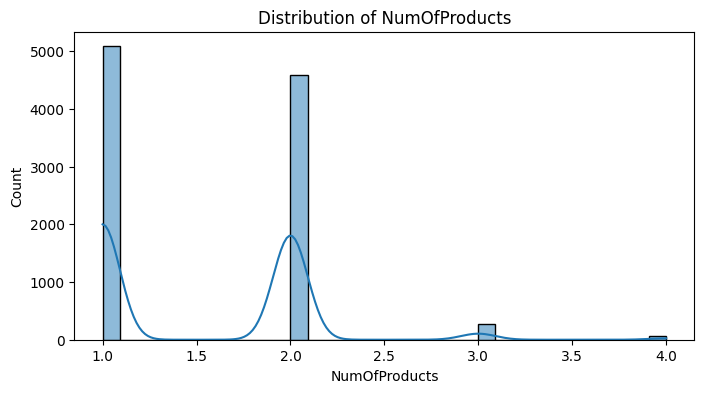

<Figure size 640x480 with 0 Axes>

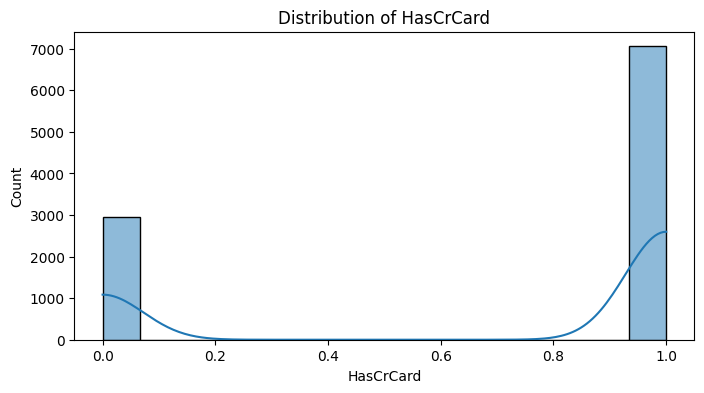

<Figure size 640x480 with 0 Axes>

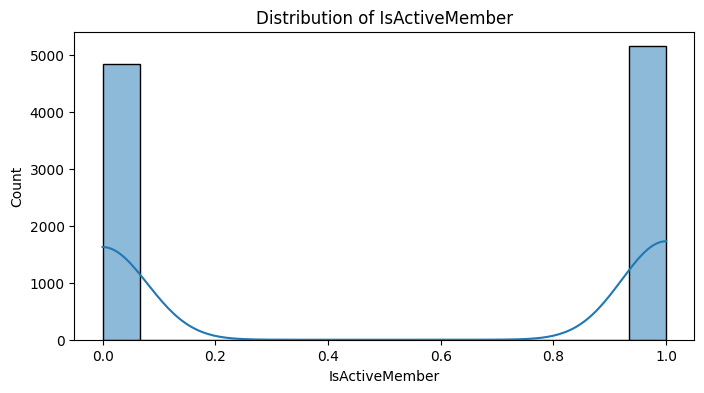

<Figure size 640x480 with 0 Axes>

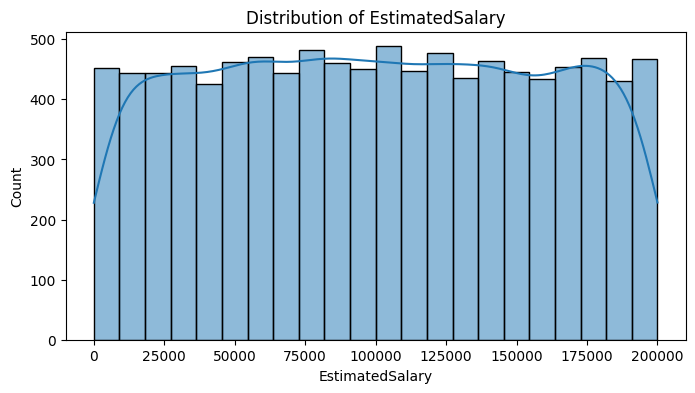

<Figure size 640x480 with 0 Axes>

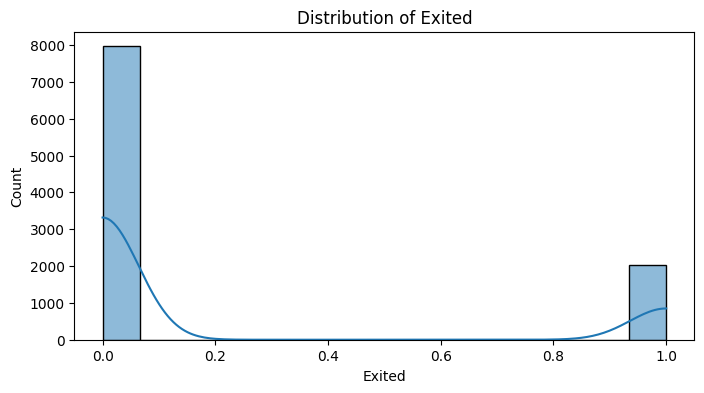

<Figure size 640x480 with 0 Axes>

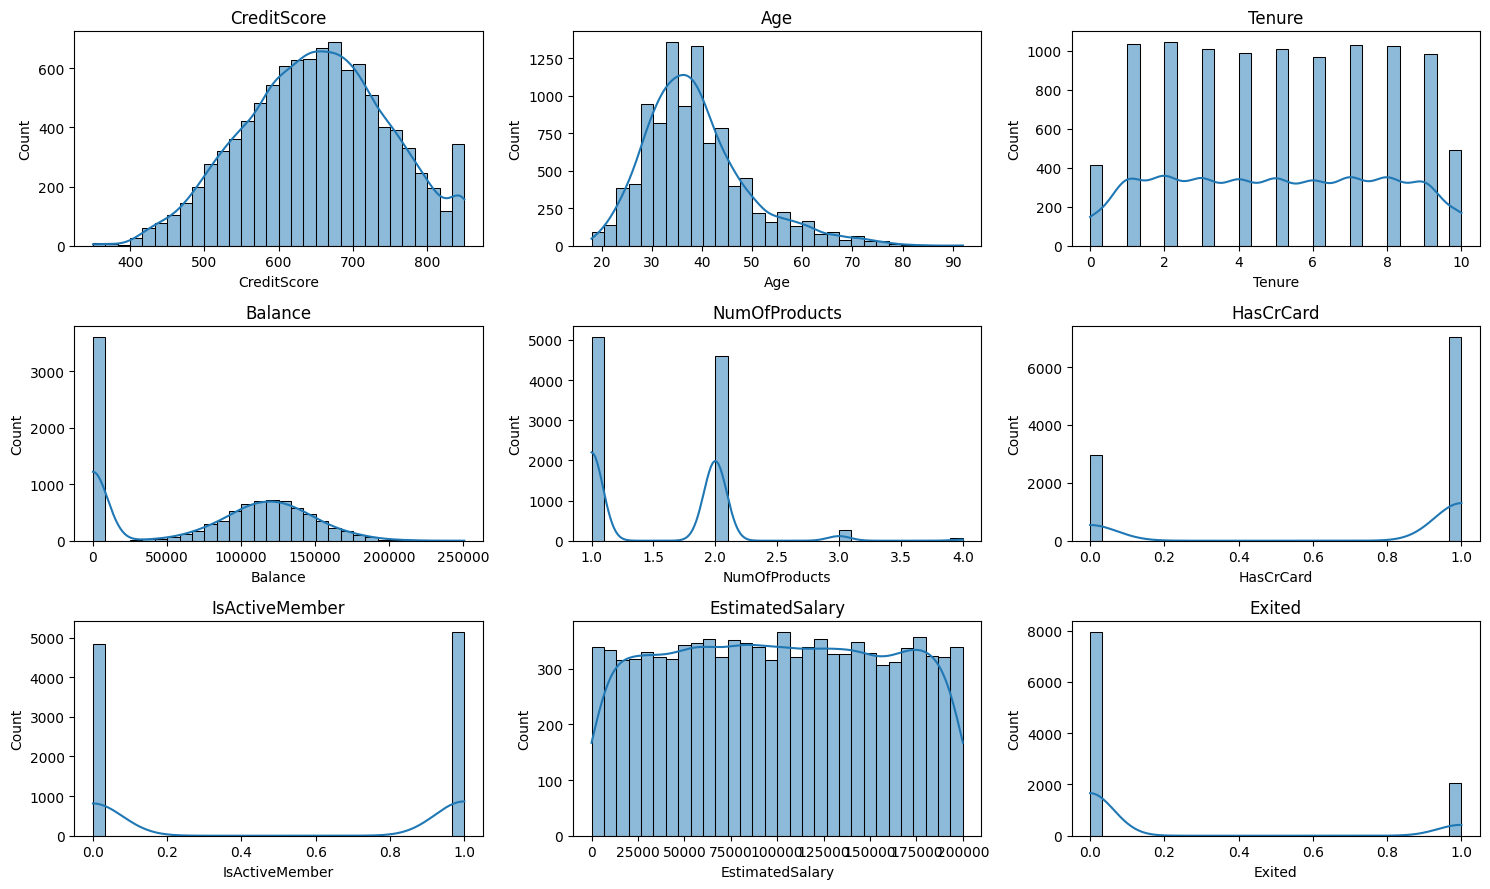

In [ ]:
# Histograms for numerical features
for col in num_cols_train:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, palette='icefire')
    plt.title(f'Distribution of {col}')
    plt.show()
    plt.tight_layout()

def dist_custom(datasetN, columns_listN, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 9))

    for i, column in enumerate(columns_listN):
        ax = axes[i // cols, i % cols]
        sns.histplot(datasetN[column], ax=ax, kde=True, bins=30, palette='icefire')
        ax.set_title(column)

    plt.tight_layout()
    plt.savefig('Distribuition.png',dpi=300)
    plt.show()

dist_custom(datasetN=df, columns_listN=num_cols_train, rows=3, cols=3)

**Distribution of Categorical Features**

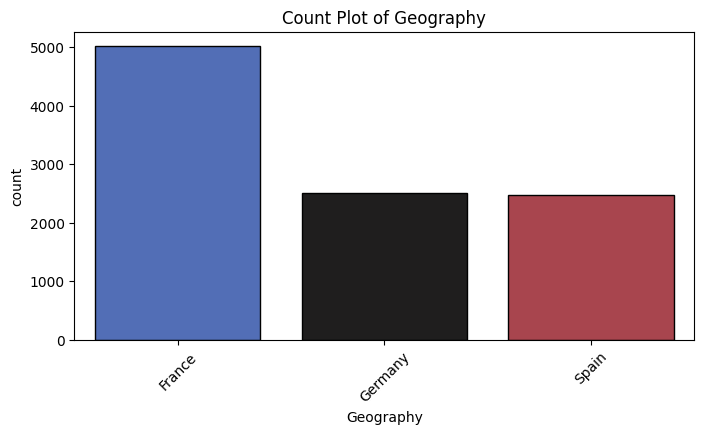

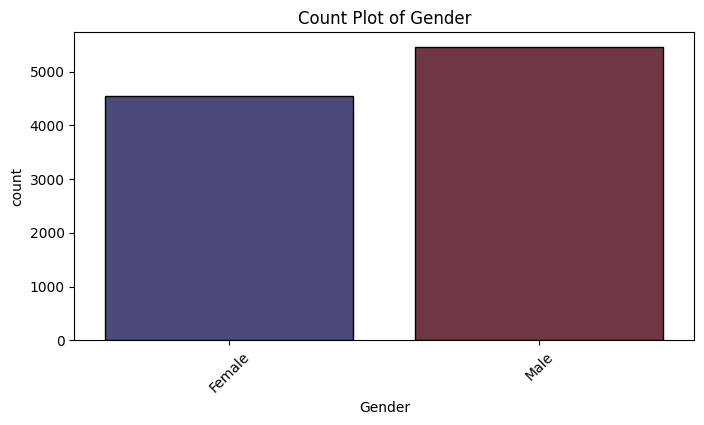

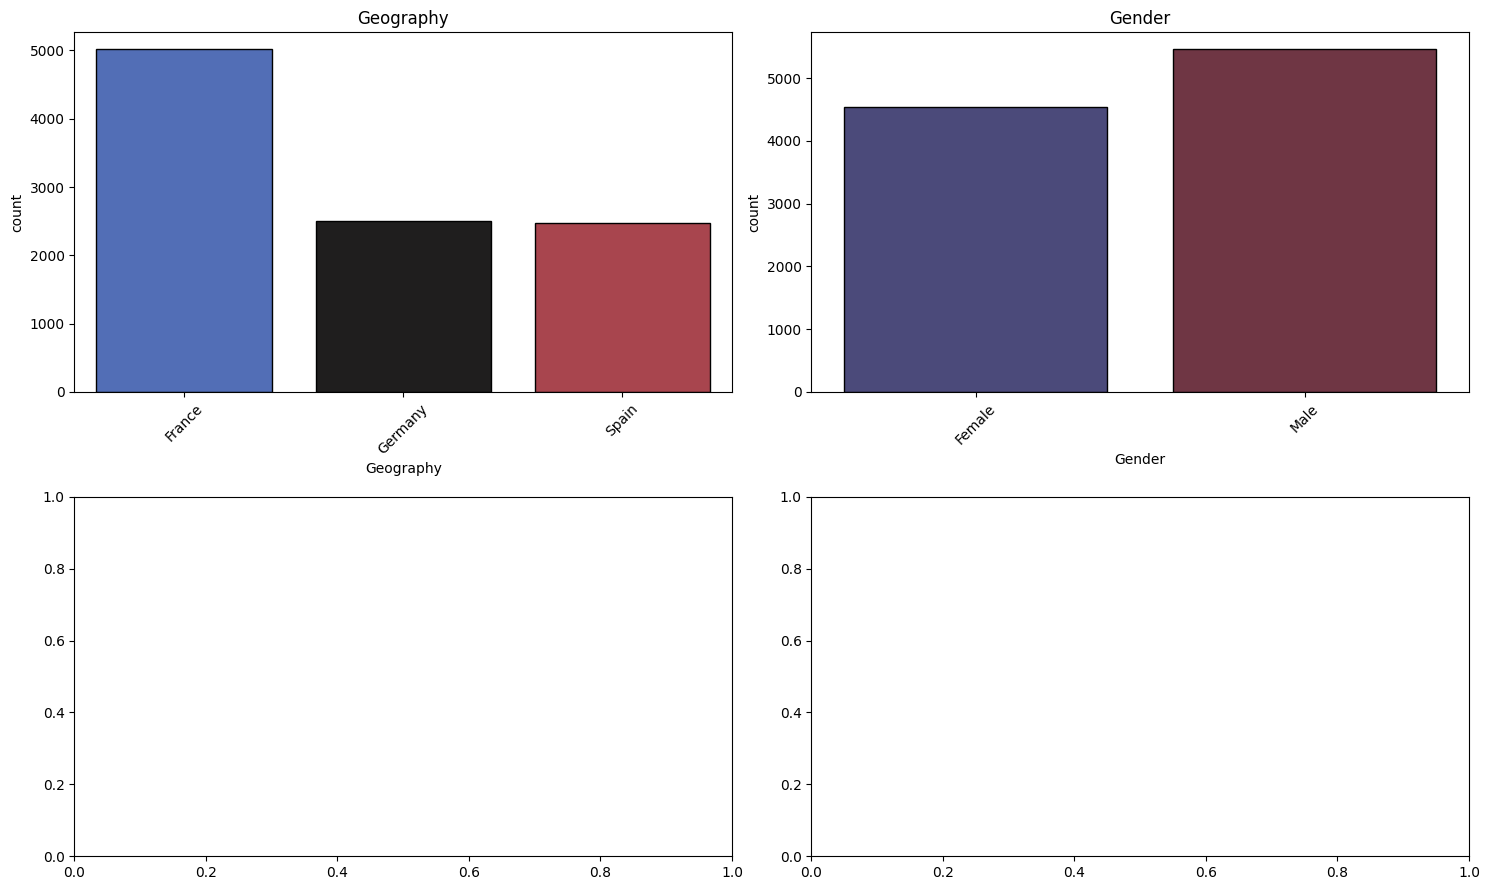

In [ ]:
# Count plots for categorical features
for col in cat_cols_train:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='icefire', edgecolor = "black")
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

def countplot_custom(datasetC, columns_listC, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 9))

    for i, column in enumerate(columns_listC):
        ax = axes[i // cols, i % cols]
        palette = sns.color_palette("husl", len(datasetC[column].unique()))  # Use 'husl' palette for unique colors
        sns.countplot(x=datasetC[column], ax=ax, palette='icefire', edgecolor = "black")
        ax.set_title(column)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.savefig('Categorical_Distributions.png', dpi=300)
    plt.show()

# Visualize the categorical feature distributions
countplot_custom(datasetC=df, columns_listC=cat_cols_train, rows=2, cols=2)  # Adjust rows and cols as needed


# **Feature Scaling & Encoding**

**Label Encoding**

In [ ]:
#Encoding
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Geography']=labelencoder.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# **Feature Selection Techniques**

In [ ]:
# Separate the target variable
y = df['Exited']

# Drop the target variable from the dataframe
X = df.drop(columns=['Exited'])

**Feature Importance from RF**

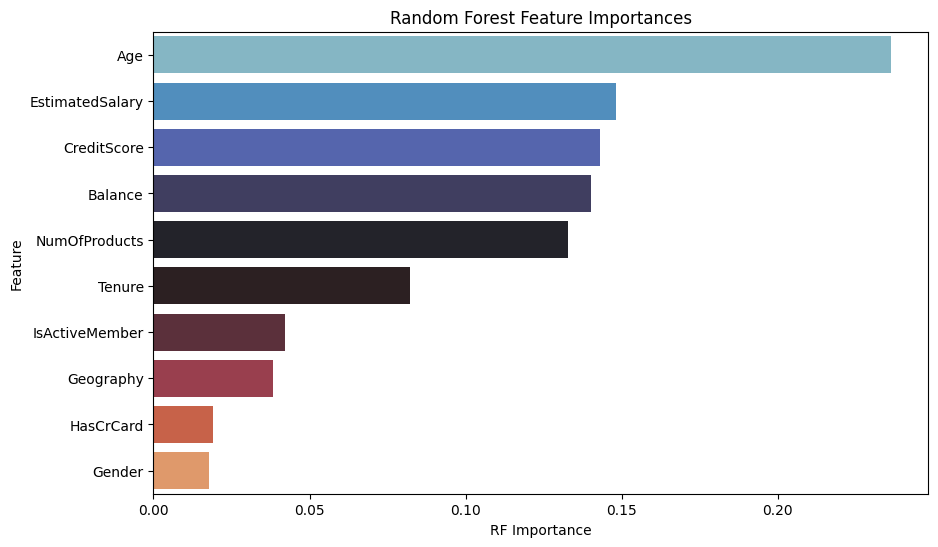

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Feature Importance from RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, y)
rf_importances = rf.feature_importances_

rf_df = pd.DataFrame({'Feature': X.columns, 'RF Importance': rf_importances})
rf_df = rf_df.sort_values(by='RF Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='RF Importance', y='Feature', data=rf_df, palette='icefire')
plt.title('Random Forest Feature Importances')
plt.show()

# **Model Analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000



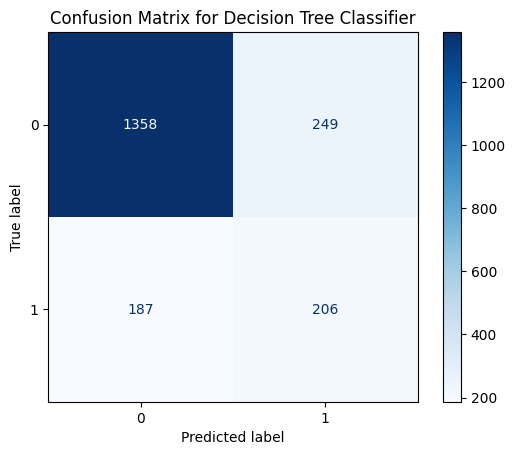

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


**Random Forest**

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



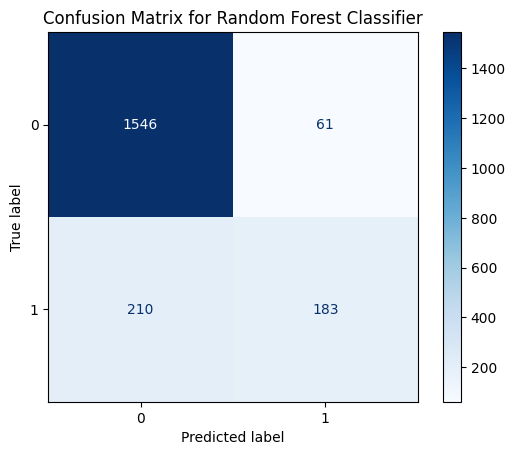

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


**XgBoost**

In [ ]:
pip install xgboost catboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.3 MB/s eta 0:00:00


Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



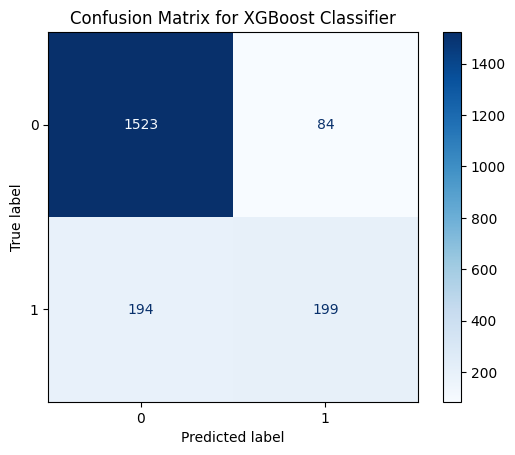

In [ ]:
import xgboost as xgb

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Classification report
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


**CatBoost**

Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



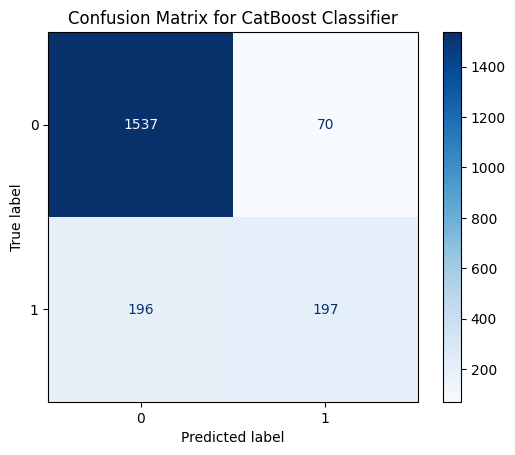

In [ ]:
from catboost import CatBoostClassifier

# CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)

# Classification report
print("Classification Report for CatBoost Classifier:")
print(classification_report(y_test, y_pred_cat))

# Confusion Matrix
cm_cat = confusion_matrix(y_test, y_pred_cat)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat)
disp_cat.plot(cmap='Blues')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

**AdaBoost**

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.47      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



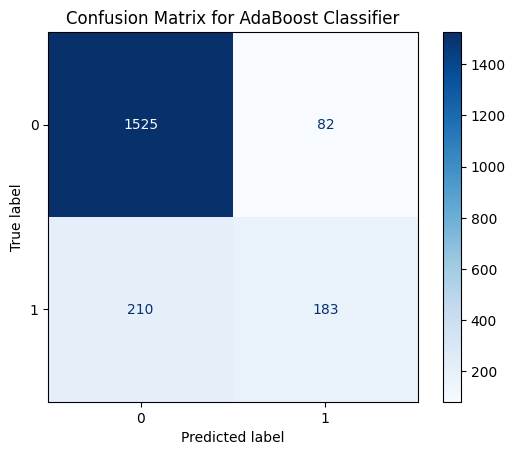

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

# Classification report
print("Classification Report for AdaBoost Classifier:")
print(classification_report(y_test, y_pred_ada))

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
disp_ada.plot(cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


**LDA**

Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



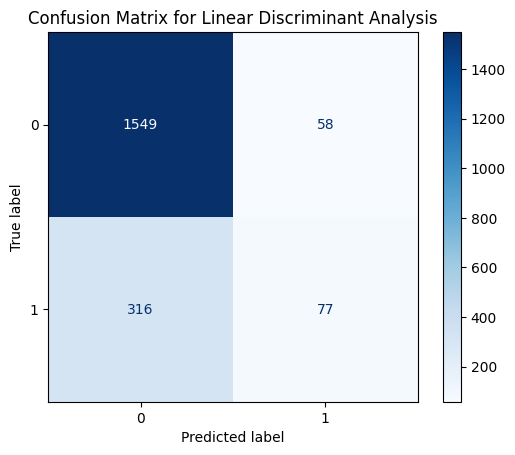

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
y_pred_lda = lda_clf.predict(X_test)

# Classification report
print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_test, y_pred_lda))

# Confusion Matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda)
disp_lda.plot(cmap='Blues')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.show()


**LightGBM**

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Classification Report for LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



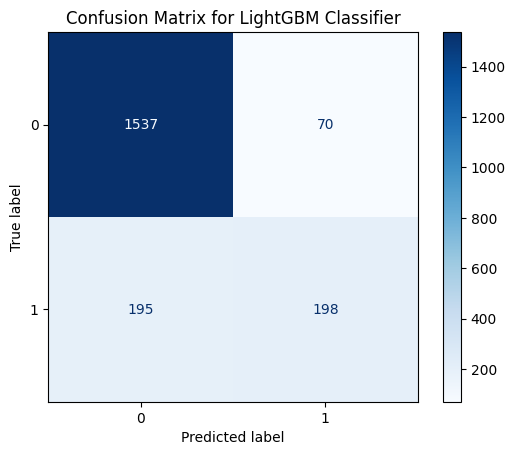

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# LightGBM Classifier
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)

# Classification report
print("Classification Report for LightGBM Classifier:")
print(classification_report(y_test, y_pred_lgb))

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)
disp_lgb.plot(cmap='Blues')
plt.title('Confusion Matrix for LightGBM Classifier')
plt.show()


**LR**

Classification Report for logistics Regression Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



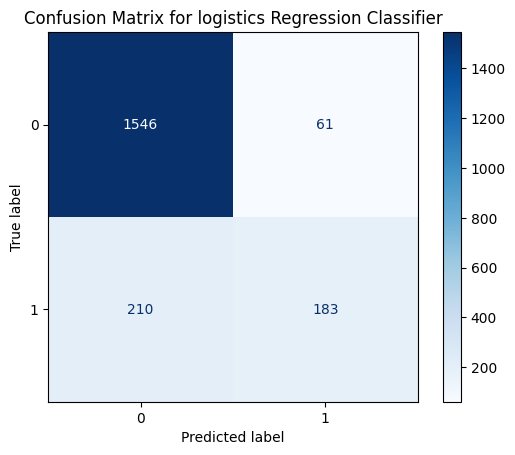

In [ ]:
from sklearn import linear_model

#logistics Regression
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Classification report
print("Classification Report for logistics Regression Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for logistics Regression Classifier')
plt.show()

**Gradaientt Boosting**

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



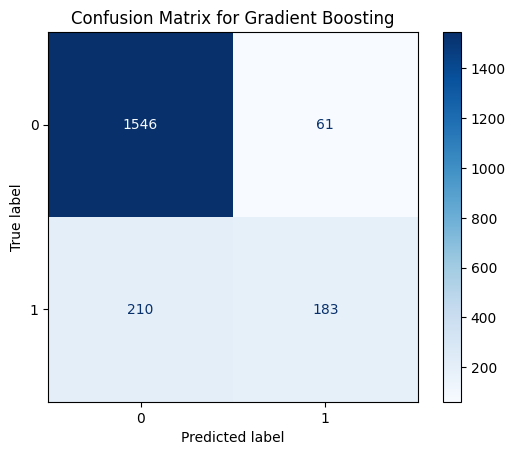

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Classification report
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# **Evaluate and Compare Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate all models
models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb_clf,
    'AdaBoost': ada_clf,
    'CatBoost': cat_clf,
    'LDA': lda_clf,
    'LightGBM': lgb_clf,
    'Logistic Regression': logr,
    'Gradient Boosting': gbc
}

results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print(results_df)

# Identify the best performing model based on F1 Score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
print(f"Best Performing Model: {best_model_name}")


                     Accuracy  Precision  Recall  F1 Score
Decision Tree          0.7820   0.795213  0.7820  0.787825
Random Forest          0.8645   0.854784  0.8645  0.851654
XGBoost                0.8610   0.850889  0.8610  0.851991
AdaBoost               0.8540   0.841943  0.8540  0.842595
CatBoost               0.8670   0.857608  0.8670  0.856813
LDA                    0.8130   0.779435  0.8130  0.774260
LightGBM               0.8675   0.858212  0.8675  0.857452
Logistic Regression    0.8005   0.740912  0.8005  0.737248
Gradient Boosting      0.8620   0.851551  0.8620  0.849482
Best Performing Model: LightGBM
